# Lab1 - Boston Housing Data

### Exercise 1
#### How many rows are in this data set? How many columns? What do the rows and columns represent?

Load modules

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
plt.style.use('fivethirtyeight')
%matplotlib inline

In [17]:
boston = pd.read_csv("boston.csv") #load data

Variables:

crim: 
per capita crime rate by town.

zn: 
proportion of residential land zoned for lots over 25,000 sq.ft.

indus: 
proportion of non-retail business acres per town.

chas: 
Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

nox: 
nitrogen oxides concentration (parts per 10 million).

rm: 
average number of rooms per dwelling.

age: 
proportion of owner-occupied units built prior to 1940.

dis: 
weighted mean of distances to five Boston employment centres.

rad: 
index of accessibility to radial highways.

tax: 
full-value property-tax rate per \$10,000.

ptratio: 
pupil-teacher ratio by town.

black: 
1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

lstat: 
lower status of the population (percent).

medv: 
median value of owner-occupied homes in \$1000s.

In [18]:
boston.shape[0] #rows

506

In [19]:
boston.shape[1] #columns

14

506 rows (observations) and 14 columns (variables)

### Exercise 2
#### Make some (2-3) pairwise scatterplots of the predictors (columns) in this data set. Describe your findings.


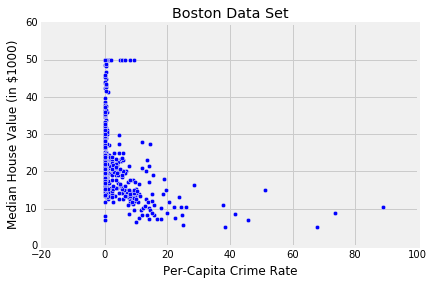

In [20]:
p1 = boston.plot(kind="scatter",x="crim",y="medv")
p1.set_ylabel("Median House Value (in $1000)")
p1.set_xlabel("Per-Capita Crime Rate")
p1.set_title("Boston Data Set")

This scatterplot shows the relationship between per-capita crime rate and median house value 
(in 1970s which explains low value of houses). Unsurprisingly, there appears to be a negative relationship. 
Note that a lot of the observations clump to the left side indicating that most of the suburbs in the 
data set are relatively safe.

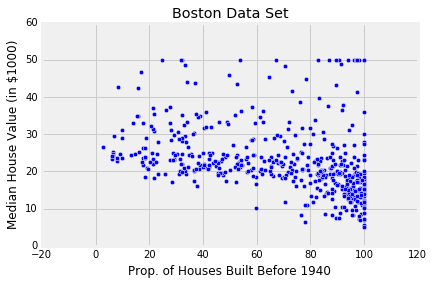

In [21]:
p2 = boston.plot(kind="scatter",x="age",y="medv")
p2.set_ylabel("Median House Value (in $1000)")
p2.set_xlabel("Prop. of Houses Built Before 1940")
p2.set_title("Boston Data Set")

This scatterplot shows the relationship between the proportion of houses built before 1940 
(proxies for older suburbs) and median house value. Again it is unsurprising that older sururbs with 
older houses have lower median values. Many of the observations clump to the right 
(100% of houses were built before 1940). Boston is a very old city so this is unsurprising as well.

### Exercise 3
#### Are any of the predictors associated with per capita crime rate? If so, explain the relationship.

In [22]:
m1 = smf.ols(formula = "crim~zn + indus + chas + nox + rm + age + dis + rad + tax + ptratio + black \
                + lstat + medv", data=boston
            ).fit()
print(m1.summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     31.47
Date:                Thu, 19 Jan 2017   Prob (F-statistic):           1.57e-56
Time:                        10:37:25   Log-Likelihood:                -1653.3
No. Observations:                 506   AIC:                             3335.
Df Residuals:                     492   BIC:                             3394.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     17.0332      7.235      2.354      0.0

The predictors that are statistically significantly associated with per-capita crime rate at the 
alpha = .05 level are proportion of residential zoning (zn) (+), weighted mean distance to five 
Boston employment centers (dis) (-), accessibility to radial highways (rad) (+), proportion of blacks (black) (-), 
and median house value (medv) (-).

The most economically significant variable of those five is distance to employment centers, 
lowering per-capita crime rate with a coefficient of nearly -1. This relationship can be speculated 
to be caused by the fact that employed people live near their work and don't need to commit crime to survive.

The most economically significant variable overall is nitrogen oxide concentration by far with a coefficient of -10. It appears from further research that nitrogen oxide can come from industrial emissions [(Source)](http://whatsyourimpact.org/greenhouse-gases/nitrous-oxide-emissions). Industrial areas can be more secluded and more shady which can facilitate more crime.

### Exercise 4
#### Are there any suburbs of Boston that appear to have particularly high crime rates? Tax rate? Pupil-teacher ratios? Comment on the range of each predictor.

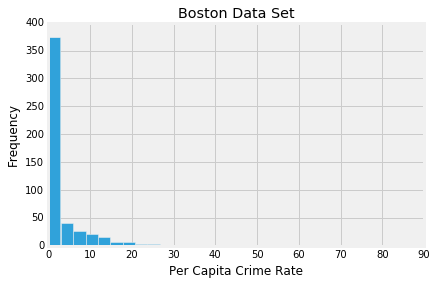

In [23]:
p3 = boston["crim"].plot.hist(bins=30)
p3.set_xlabel("Per Capita Crime Rate")
p3.set_title("Boston Data Set")

In [24]:
boston[boston["crim"] > 25].shape[0]

11

The vast majority of suburbs have per-capita crime rates under 25. There are 11 of 506 suburbs that have extreme crime rates (over 25 per capita) but they are not the norm. The distribution of crime rates is very right skewed.

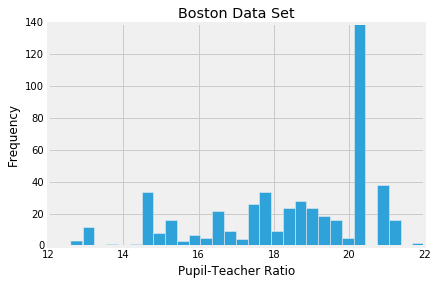

In [25]:
p5 = boston["ptratio"].plot.hist(bins=30)
p5.set_xlabel("Pupil-Teacher Ratio")
p5.set_title("Boston Data Set")

In [27]:
boston[boston["ptratio"] == 20.2].shape[0]

140

In [28]:
boston[boston["ptratio"] == 20.2].shape[0]/boston.shape[0]

0.2766798418972332

The pupil-teacher ratio appears to mostly be distributed uniformly across a range of 12.5 to 22.5. The one major exception 
is that at the 20-21 pupil-teacher ratio bin, there is a significant spike. Upon further investigation, there are 
140 suburbs (28%) with exactly 20.2 pupil-teacher ratio. I suspect this may be due to some policy that caps class sizes
in certain schools or lazy statistical reporting.

### Exercise 5
#### How many of the suburbs in this data set bound the Charles river?

In [29]:
boston["chas"].sum()

35

There are 35 suburbs in this dataset that are bound to the Charles river.

### Exercise 6
#### What is the median pupil-teacher ratio among the towns in this data set?

In [30]:
boston["ptratio"].median()

19.05

The median pupil-teacher ratio among towns in this data set is 19.05.

### Exercise 7
#### If you want to build a model to predict the average value of a home based on the other variables, what is your output/response? What is your input?

In [31]:
print(m1.summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     31.47
Date:                Thu, 19 Jan 2017   Prob (F-statistic):           1.57e-56
Time:                        11:00:26   Log-Likelihood:                -1653.3
No. Observations:                 506   AIC:                             3335.
Df Residuals:                     492   BIC:                             3394.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     17.0332      7.235      2.354      0.0

The output/response variable would be medv and the remaining variables are the input variables. According to a multiple 
regression, most predictors in the dataset do affect median house value.